Markdown macros

$\newcommand{\I}{\mathrm{i}} 
\newcommand{\E}{\mathrm{e}} 
\newcommand{\D}{\mathop{}\!\mathrm{d}}
\newcommand{\bra}[1]{\langle{#1}|}
\newcommand{\ket}[1]{|{#1}\rangle}
\newcommand{\braket}[1]{\langle{#1}\rangle}
\newcommand{\bm}[1]{\boldsymbol{#1}}$

In [1]:
# numpy
import numpy as np
# matplotlib
import matplotlib
import matplotlib.pylab as plt
from IPython.display import Image
# sympy
import sympy as sy
sy.init_printing(use_unicode = True)

In [2]:
%matplotlib inline

# Bras articulé

On étudie le mouvement d'un bras constitué de deux éléments identiques de masse $m$ et de longueur $l$, raccordés à leur extemité; les deux bras peuvent tourner sans frottement autour des axes $O_1$ et $O_2$ (voir la figure).

On choisit un repère fixe $(X,Y,Z)$ dans lequel la gravité a la direction $-\hat{\bm Y}$. Les repères mobiles sont attachés *aux centres de masse* de deux bras.

On note 1 le premier bras et 2 le second.

Le repère mobile $(x_1,y_1)$ résulte de la rotation autour de $\hat{\bm Z}$ du repère fixe d'un angle $\phi_2$, une rotation supplémentaire d'angle $\phi_2$, donne l'orientation du second bras. Par conséquent, le second bras fait un angle $\phi = \phi_1 + \phi_2$ par rapport à l'horizontale $X$.

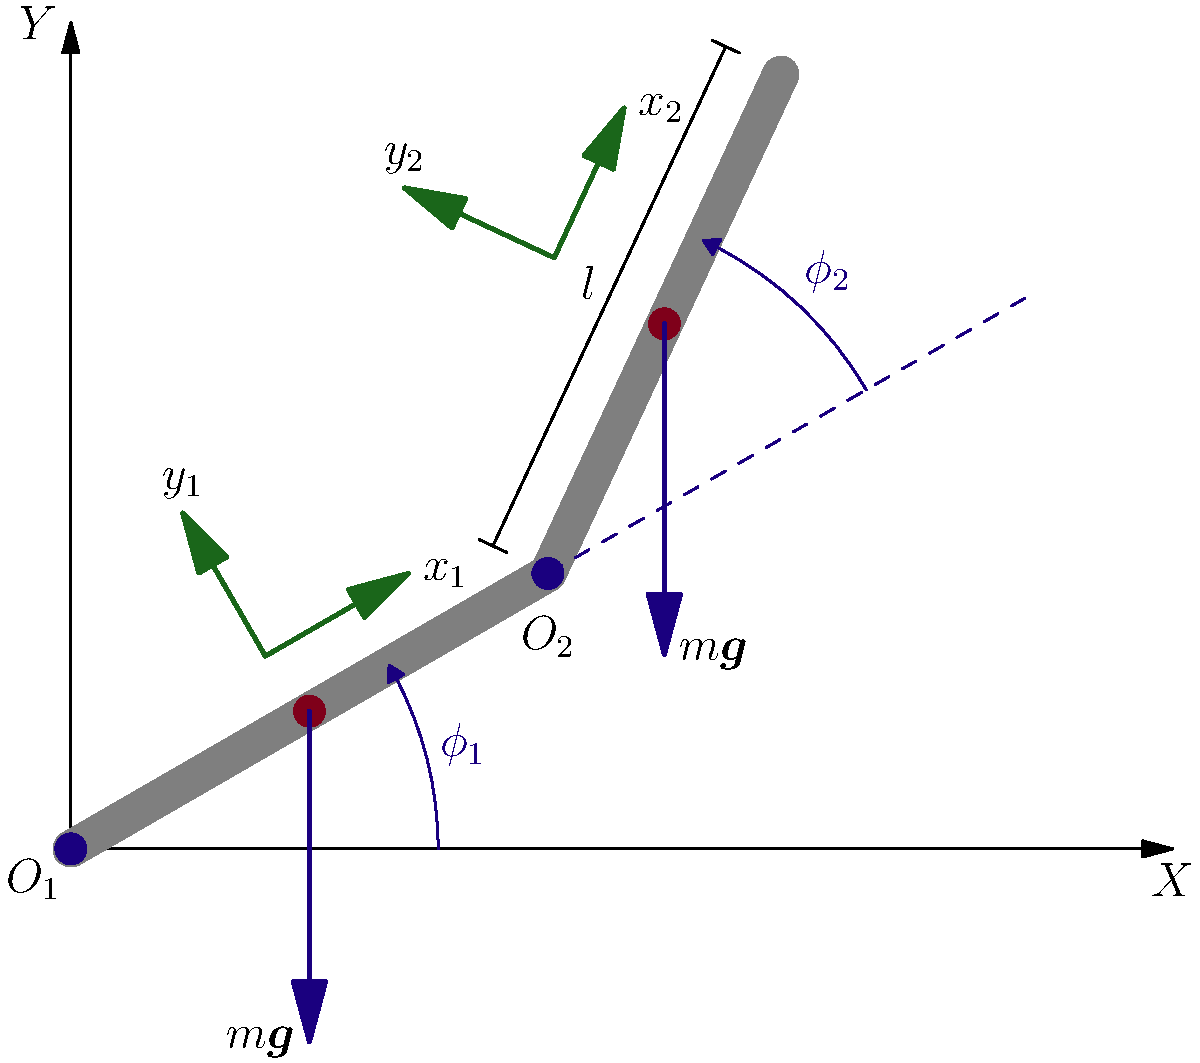

In [3]:
Image(filename='bras.png', width=400)

* Centre de masse

La position des centres de masse est
$$\bm G_1 = \frac{l}{2} \hat{\bm x}_1$$
et
$$\bm G_2 = 2\bm G_1 + \frac{l}{2} \hat{\bm x}_2$$

En utilisant la rotation $\hat{\bm x}_1 = R_z(\phi_1) \hat{\bm X}$ on obtient
$$\hat{\bm x}_1 = \begin{pmatrix} \cos\phi_1 \\ \sin\phi_1 \\ 0\end{pmatrix}$$
De même on a 
$$\hat{\bm x}_2 = R_z(\phi_2)R_z(\phi_1) \hat{\bm X} = R_y(\phi) \hat{\bm X}$$
ce qui donne
$$\hat{\bm x}_2 = \begin{pmatrix} \cos\phi \\ \sin\phi \\ 0\end{pmatrix}$$

* Vitesse

$$\bm  V_1 = \frac{l \dot{\phi}_1}{2}  \begin{pmatrix} -\sin\phi_1 \\ \cos\phi_1 \\ 0\end{pmatrix}$$
et
$$\bm  V_2 = \frac{l}{2}  \begin{pmatrix} -2 \dot{\phi}_1\sin\phi_1 - (\dot{\phi}_1 + \dot{\phi}_2) \sin(\phi_1 + \phi_2) \\ 2 \dot{\phi}_1\cos\phi_1 + (\dot{\phi}_1 + \dot{\phi}_2) \cos(\phi_1 + \phi_2) \\ 0\end{pmatrix}$$


* Vitesse angulaire

On a
$$\bm \omega_1 = \dot{\phi}_1 \hat{\bm Z}$$
et
$$\bm \omega_2 = (\dot{\phi}_1 + \dot{\phi}_2) \hat{\bm Z} = \dot{\phi} \hat{\bm Z}$$

Le moments d'inertie par rapport aux centres de masse sont (en supposant des cylindres de section négligeable)
$$I = I _G = \frac{ml^2}{12}, \quad I_y = I_z = I$$
pour les deux bras.

## Énergie cinétique

L'énergie cinétique s'écrit
$$K(\phi_1,\phi_2) = \frac{m}{2}\big( V_1^2 + V_2^2\big) + \frac{I}{2}\big( \omega_1^2 + \omega_2^2 \big)$$
avec
$$V_1^2 = \frac{l^2}{4} \dot{\phi}_1^2$$
et
$$V_2^2 = \frac{l^2}{4}\Big[4\dot{\phi}_1^2 + (\dot{\phi}_1 + \dot{\phi}_2)^2 + 4\dot{\phi}_1(\dot{\phi}_1 + \dot{\phi}_2)\cos\phi_2  \Big]$$
La partie de vitesse angulaire est
$$\frac{I}{2}\big(\omega_1^2 + \omega_2^2\big) = \frac{ml^2}{24}\big( \dot{\phi}_1^2 + (\dot{\phi}_1 + \dot{\phi}_2)^2 \big)$$
On trouve finalement,
$$K = \frac{2ml^2}{3}\dot{\phi}_1^2 + \frac{ml^2}{6}(\dot{\phi}_1 + \dot{\phi}_2)^2 + \frac{ml^2}{2} \dot{\phi}_1(\dot{\phi}_1 + \dot{\phi}_2)\cos\phi_2 $$

In [4]:
f1 = sy.Function("phi_1", real = True)
f2 = sy.Function("phi_2", real = True)
t = sy.symbols("t", real = True)
m, l, g = sy.symbols("m, ell, g", positive = True)

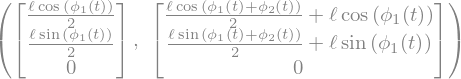

In [5]:
# centre de masse
G_1 = (l/2) * sy.Matrix([sy.cos(f1(t)), sy.sin(f1(t)), 0])
G_2 = 2*G_1 + (l/2) * sy.Matrix([sy.cos(f1(t) + f2(t)), sy.sin(f1(t) + f2(t)), 0])
G_1, G_2

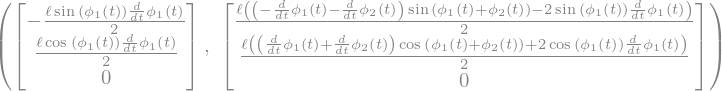

In [6]:
# vitesse: calcul des dérivées
V_1 = sy.diff(G_1, t)
V_2 = sy.simplify( sy.diff(G_2, t) )
V_1, V_2

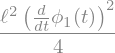

In [6]:
# carrée des vitesses
V2_1 = sy.simplify( V_1.T * V_1 )[0]
V2_1

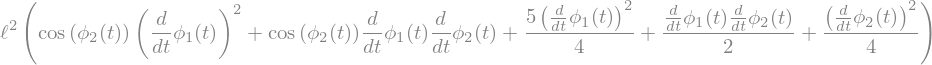

In [7]:
# carrée des vitesses
V2_2 = sy.simplify( V_2.T * V_2 )[0]
V2_2

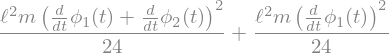

In [8]:
# vitesse angulaire
w_1 = sy.diff(f1(t), t)
w_2 = sy.diff(f1(t), t) + sy.diff(f2(t), t)
# wIw
I = m*l**2/12
k = I*w_1**2/2 + I*w_2**2/2
k

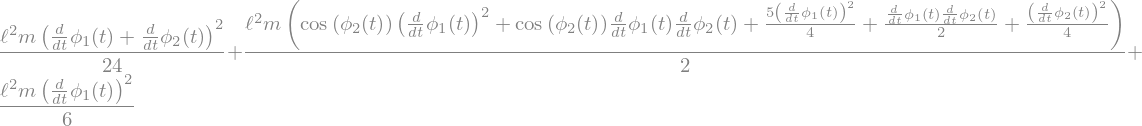

In [9]:
K = m*V2_1/2 + m*V2_2/2 + k
K

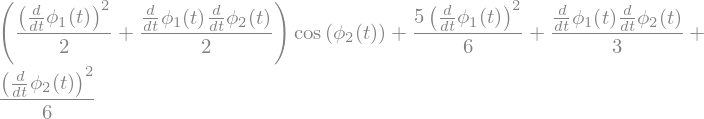

In [10]:
sy.collect(sy.expand(K/m/l**2), sy.cos(f2(t)))

## Équation de mouvement

Méthode dite analytique (voir [Wikipedia](https://en.wikipedia.org/wiki/Lagrangian_mechanics)).

On utilise la formule, valable pour le cas conservatif:
$$\frac{\D}{\D t}\frac{\D \mathcal{L}}{\D \dot\phi_1} - \frac{\D \mathcal{L}}{\D \phi_1} = 0, \quad
\frac{\D \mathcal{L}}{\D \dot\phi_2} - \frac{\D \mathcal{L}}{\D \phi_2} = 0$$
avec
$$\mathcal{L} = K - U$$
où $K = K(\phi_{1,2}, \dot\phi_{1,2})$ est considérée comme une fonction des angles et des vitesses, et $U(\phi_{1,2})$ est l'énergie potentielle, due à la gravité $-mgZ$:
$$U = \frac{3mgl}{2}\sin(\phi_1) + \frac{mgl}{2}\sin(\phi_1 + \phi_2)$$
($Z = l\sin\phi_1/2$, etc. c'est la hauteur du centre de masse). La fonction $\mathcal{L}$ s'appelle le "lagrangien", et c'est la différence de l'énergie cinétique et de l'énergie potentielles vues comme fonctions de positions et vitesses de tous les dégrés de liberté du système mécanique.

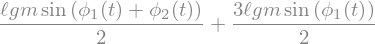

In [11]:
U = 3*m*g*l/2*sy.sin(f1(t)) + m*g*l/2*sy.sin(f1(t) + f2(t))
U

In [12]:
lag = K - U
f1t = sy.diff(f1(t), t)
f2t = sy.diff(f2(t), t)
Eq1 = sy.diff(sy.diff(lag, f1t), t) - sy.diff(lag, f1(t))
Eq2 = sy.diff(sy.diff(lag, f2t), t) - sy.diff(lag, f2(t))

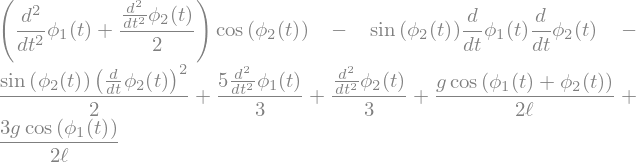

In [13]:
sy.collect( sy.simplify(Eq1/m/l**2), sy.cos(f2(t)) )

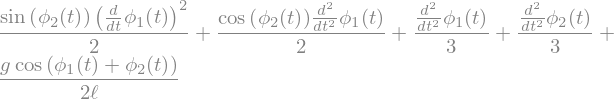

In [14]:
sy.simplify(Eq2/m/l**2)

On obtient finalement,
$$\left( \frac{4}{3} + \cos\phi_2 \right) \ddot\phi_1 +
\left( \frac{1}{3} + \frac{1}{2}\cos\phi_2 \right) \ddot\phi_2 -
\dot\phi_2 (\dot\phi_1 + \dot\phi_2) \sin \phi_2 + 
\frac{3g}{2l} \cos\phi_1 + \frac{g}{2l} \cos(\phi_1 + \phi_2) = C_1$$
et
$$\left( \frac{1}{3} + \frac{1}{2}\cos\phi_2 \right) \ddot\phi_1 + 
\sin\phi_2 \frac{\dot\phi_1^2}{2} + 
\frac{\ddot\phi_2}{3} + \frac{g}{2l} \cos(\phi_1 + \phi_2) = C_2$$
où nous avons ajouté deux moteurs en $O_{1,2}$, dont les couples respectifs sont $C_{1,2}$.

Le cas du *double pendule* s'obtient en faisant $C_{1,2}= 0$ et en inversant la gravité $g \rightarrow -g$ (pour avoir a $\phi_{1,2} =  0$ le point d'équilibre).

## Application: décollage

On se propose de déterminer la vitesse angulaire $\Omega$ nécessaire pour faire décoller le bras (2) du système de la figure ci-dessous.

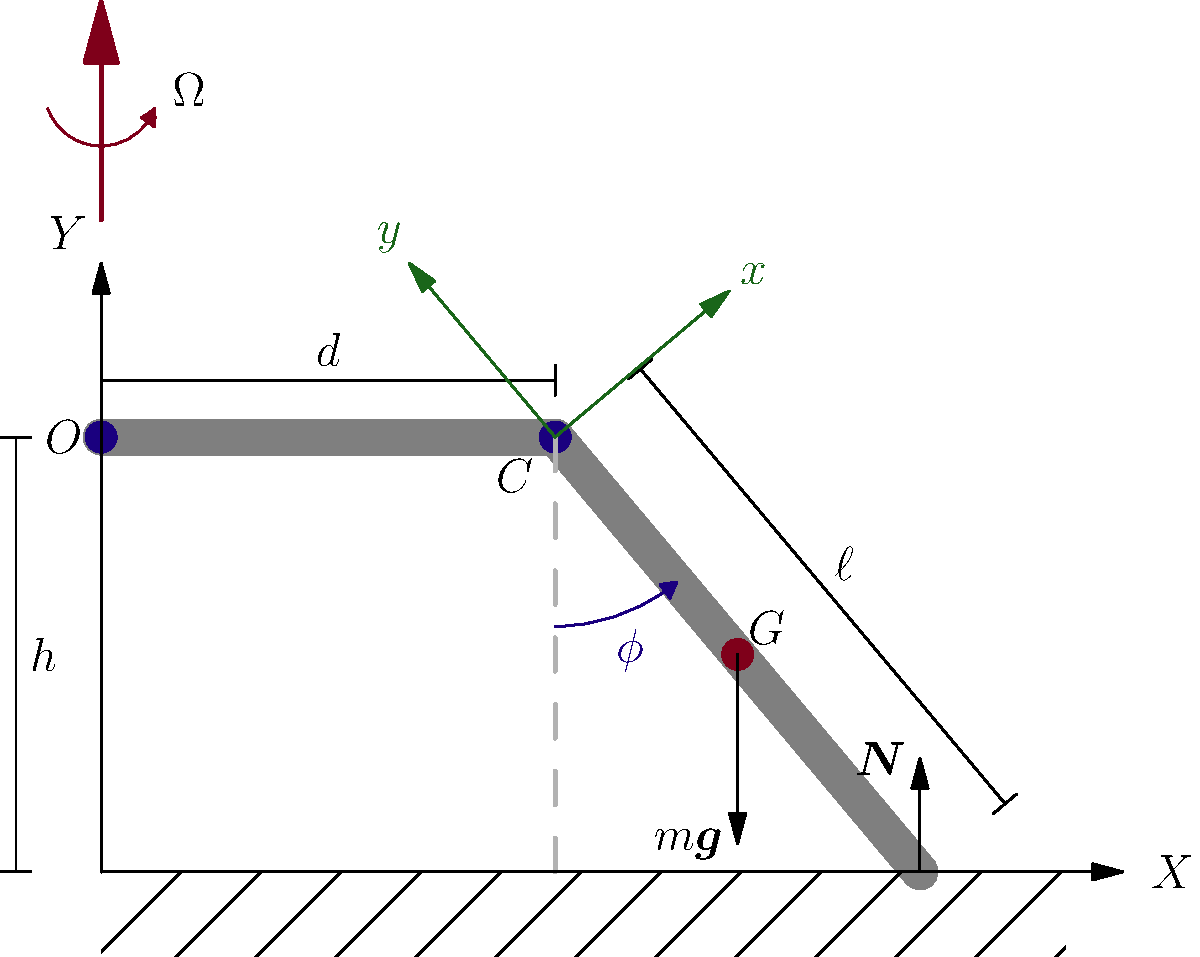

In [8]:
Image(filename='decollage.png', width=400)

Le bras effectue une rotation rigide $\Omega$ autour de l'axe $Y$; le point $O$ auquel est attaché le bras horizontal est fixe (à la hauter $h$), par contre le point $C$ de l'articulation, situé à une distance $d$ de $O$, permet au deuxième bras de tourner dans le plan mobile $(x,y)$. La position du bras mobile (dans le repère tournant) est déterminée par l'angle $\varphi$. Le bras mobile est de longueur $\ell$ et de section négligeable; sa masse est $m$.

Comme on ne s'intéresse qu'au décollage du point $P$, on suppose $\varphi$ *constant*: notre but est de trouver la vitesse angularie $\Omega$ pour laquelle la force normale en $P$, la réaction $\bm N$, s'annule.

### Cinématique

On choisit le point $C$ comme origine des axes mobiles, et on y décrit le mouvement de rotation. Le aposition du centre de masse y est fixe
$$\bm G = -\frac{\ell}{2} \hat{\bm y}.$$

Le moment d'inertie est $I_C = m\ell^2/3$.


* Coordonnées du repère fixe dans celles du mobile $(x,y,z)$:
$$\hat{\bm X} = C_z(\varphi) \hat{\bm x} = \begin{pmatrix} \cos\varphi \\ -\sin\varphi \\ 0 \end{pmatrix}$$
et
$$\hat{\bm Y} = C_z(\varphi) \hat{\bm y} = \begin{pmatrix} \sin\varphi \\ \cos\varphi \\ 0 \end{pmatrix}.$$

* Vitesse et accélération angulaire
$$\bm \omega = \Omega \hat{\bm Y} = \Omega \big( \sin\varphi \hat{\bm x} + \cos\varphi \hat{\bm y} \big)$$
et
$$\dot{\bm \omega} = \dot\Omega \big( \sin\varphi \hat{\bm x} + \cos\varphi \hat{\bm y} \big)$$

### Dynamique

* Moment par rapport à $C$. 

Le repère $C$ tourne à la vitesse angulaire $\Omega$, $$\frac{\D_C  \bm L}{\D t} = m \bm G \wedge \bm a + I_C \dot{\bm \omega} + \bm \omega \wedge (I_C \bm \omega)  = \bm M_C$$
avec l'accélération
$$\bm a = \bm \omega \wedge (\bm \omega \wedge \bm d) = d \Omega^2 \begin{pmatrix} -\cos\varphi \\ \sin\varphi \\ 0 \end{pmatrix}$$
($\bm d = d \hat{\bm X}$), et $\bm M_C$ le moment de forces.

On se rappelle que la variation d'un vecteur $\bm v$ dans un repère "A" est 
$$\frac{\D_A \bm v}{\D t} = \dot{\bm v} + \bm \omega \wedge  \bm v$$
exprimée dans un repère "B", lequel tourne à vitesse angulaire $\bm \omega$. La formule de $\bm a$ résulte de la formule de la vitesse de rotation d'un point $\bm r$, $\bm v = \omega \wedge \bm r$. Par conséquent, $\bm G \wedge (m\bm a)$ est le moment dû à l'accélération (centripète) resentie au repère tournant.

Le moment dû à l'accélération est donc
$$m \bm G \wedge \bm a = -\frac{m\ell d}{2}  \Omega^2 \cos\varphi.$$

Le terme d'inertie est
$$\bm \omega \wedge (I_C \bm \omega) = -\frac{m\ell^2\Omega^2}{6}\sin(2\varphi).$$

* Moment de forces
Le moment de la gravité est
$$\bm M_C^G = -\frac{\ell}{2} \hat{\bm y} \wedge mg(-\hat{\bm Y}) = -\frac{mg\ell}{2} \sin\varphi \hat{\bm z},$$
et celui de la force de réaction en $P$
$$M_C^P = \ell N \sin\varphi \hat{\bm z}.$$


### Équation de moments

On arrive à l'équation de bilan de moments (dans la direction $z$, notez que $I_C \dot{\bm \omega}$ n'a pas de composante dans cette direction)
$$\frac{mg\ell}{2} \sin\varphi - N\ell\sin\varphi = \frac{m\ell d}{2}  \Omega^2 \cos\varphi + \frac{m\ell^2\Omega^2}{6}\sin(2\varphi)$$

La condition de décollement est $N=0$:
$$\Omega^2_0 = \frac{g \tan\varphi_0}{d + (2\ell/3) \sin\varphi_0},$$
avec $\cos\varphi_0 = h/\ell$. Pour $\Omega > \Omega_0$ le bras mobile décolle.

In [29]:
phi = sy.Symbol("varphi", real = True)
o = sy.Symbol("Omega", real = True)
m, g, l, d, h = sy.symbols("m, g, ell, d, h", positive = True)

In [13]:
def C_z(phi):
        c = sy.cos(phi)
        s = sy.sin(phi)
        return sy.Matrix([[c, s, 0], [-s, c, 0], [0, 0, 1]])

In [14]:
e1 = sy.Matrix([1, 0, 0])
e2 = sy.Matrix([0, 1, 0])
e3 = sy.Matrix([0, 0, 1])

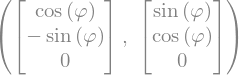

In [15]:
X = C_z(phi)*e1
Y = C_z(phi)*e2
X, Y

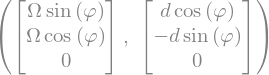

In [21]:
w = o*Y
c = d*X
w, c

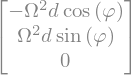

In [24]:
v = w.cross(c) # vitesse de rotation de C
a = sy.trigsimp( w.cross(v) ) # accélération angulaire de C
a

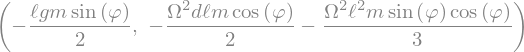

In [36]:
G = -l/2 * e2
Ic = m*l**2/3
MG = m*G.cross(a)
MI = Ic * w.cross(w[0]*e1)
Mgrav = G.cross(-m*g*Y)
Mgrav[2], MG[2] + MI[2]

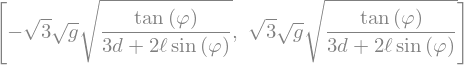

In [37]:
sy.solve(-Mgrav[2] + MG[2] + MI[2], o)

# Graphes

## Bras articulé
(Robot, double pendule, ...)

```c
import settings;
usepackage("bm");
render = 4;
size(300);

// couleurs
pen cr = rgb(0.5, 0, 0.1);
pen cg = rgb(0.1, 0.4, 0.1);
pen cb = rgb(0.1, 0, 0.5);

// géométrie
real phi1 = 30*pi/180;
real phi2 = 35*pi/180;
real phi = phi1 + phi2;
real l = 1;

pair o1 = (0,0);
pair o2 = (l*cos(phi1), l*sin(phi1));
pair o3 = (l*cos(phi), l*sin(phi));

// axe fixe XY
draw((0,0)--(2,0), EndArrow);
label("$X$", (2,0), S);
draw((0,0)--(0,3*2/4), EndArrow);
label("$Z$", (0,3*2/4), W);

// bras
draw(o1--o2--(o2 + o3), 9bp+gray(.5));
draw(Label("$l$", LeftSide), (o2 + (-0.1, 0.05))--(o2 + o3 + (-0.1, 0.05)), Bars);

// axes mobiles 1 et 2
real s = 0.3;
pair t1 = (-0.08, 0.1);
pair t2 = (-0.2, 0.12);
pair p1 = shift(t1)*(o2/2);
pair p2 = shift(t2)*(o2 + o3/2);
pair x1 = p1 + s*o2;
pair y1 = p1 + s*(-sin(phi1), cos(phi1));
pair x2 = p2 + s*o3;
pair y2 = p2 + s*(-sin(phi), cos(phi));
draw(p1 -- x1, 1bp+cg, EndArrow);
draw(p1 -- y1, 1bp+cg, EndArrow);
draw(p2 -- x2, 1bp+cg, EndArrow);
draw(p2 -- y2, 1bp+cg, EndArrow);
label("$x_1$", x1, E);
label("$y_1$", y1, N);
label("$x_2$", x2, E);
label("$y_2$", y2, N);

// centre de masse
dot(o1, 8bp+cb);
label("$O_1$", o1, SW);
dot(o2/2, 8bp+cr);
dot(o2, 8bp+cb);
label("$O_2$", o2, 3*S);
dot(o2 + o3/2, 8bp+cr);

// gravité
draw(o2/2--(o2/2 - (0, 0.6)), 1bp+cb, Arrow);
label("$m\bm g$", (o2/2 - (0, 0.6)), W);
draw((o2 + o3/2)--(o2 + o3/2 - (0, 0.6)), 1bp+cb, Arrow);
label("$m\bm g$", (o2 + o3/2 - (0, 0.6)), E);

// angles 30 et 35
draw("$\phi_1$", arc(o1, 2*l/3, 0, 30), cb, ArcArrow);
draw("$\phi_2$", arc(o2, 2*l/3, 30, 30 + 35), cb, ArcArrow);
draw(o2--(2*o2), cb+dashed);

```

## Bras articulé: décollage

```c
import settings;
import patterns;
usepackage("bm");
render = 4;
size(300);

add("hatch",hatch());

// couleurs
pen cr = rgb(0.5, 0, 0.1);
pen cg = rgb(0.1, 0.4, 0.1);
pen cb = rgb(0.1, 0, 0.5);

real l = 1;
real d = 0.8;
real phi = 40*pi/180;
real h = l*cos(phi);

pair o = (0, h);
pair C = (d, h);
pair G = (d + l/2*sin(phi), h - l/2*cos(phi));
pair P = (d + l*sin(phi), 0);

// bras et repère fixe
draw(o--C--P, 9bp+gray(.5));
fill((0,0)--(0, -0.15)--(1.7, -0.15)--(1.7, 0)--cycle, pattern("hatch"));
// axes, centre de masse, ...
dot(o, 8bp+cb);
label("$O$", o, 1.3*W);
dot(C, 8bp+cb);
label("$C$", C, 2.2*Sw);
dot(G, 8bp+cr);
label("$G$", G, NE);
// angle
draw(C--(C - (0, h)), 1bp+dashed+gray(0.7));
draw("$\phi$", arc(C, l/3, -90, -90 + phi*180/pi), cb, ArcArrow);
// cotes
draw("$d$", shift((0, 0.1))*(C--o), Bars);
draw("$\ell$", shift((0.15, 0.12))*(P--C), Bars);
draw("$h$", shift((-0.15, 0))*((0,0)--o), Bars);

// axes mobiles
draw(Label("$y$", EndPoint), C--(C + 0.4*(-sin(phi), cos(phi))), cg, Arrow);
draw(Label("$x$", EndPoint), C--(C + 0.4*(cos(phi), sin(phi))), cg, Arrow);

// vitesse angulaire
draw(arc((0, 1.8*h), 0.1, 200, 340), cr, ArcArrow);
draw((0, 1.5*h)--(0, 2.0*h), 1bp+cr, EndArrow);
label("$\Omega$", (0.1, 1.8*h), E);

// forces
draw(G--(G - (0,l/3)), EndArrow);  // gravité
draw(P--(P + (0,l/5)), EndArrow);  // normale
label("$m \bm g$", (G - (0,l/3)), W);
label("$\bm N$", (P + (0,l/5)), W);

draw(Label("$X$", EndPoint, 2*E), (0, 0)--(1.8, 0),  Arrow);
draw(Label("$Y$", EndPoint, 1.4*NW), (0, 0)--(0, 1.4*h), Arrow);
```
